In [1]:
#%%

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import pandas as pd
import stanza
import pandas as pd 
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 2000
pd.options.display.max_colwidth = 2000



import sentiment_score as ss
import importlib
#%%


import re


C:\Users\benan\AppData\Roaming\Python\Python37\site-packages\huggingface_hub\snapshot_download.py:11: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  FutureWarning,
C:\Users\benan\AppData\Roaming\Python\Python37\site-packages\huggingface_hub\file_download.py:591: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


In [2]:

nlp = stanza.Pipeline('en', processors='tokenize,pos')
def clean_text(lor):
    lor = re.sub(r"\n"," ",lor)
    lor = re.sub(r"\"","",lor)
    lor = re.sub(r"\\","",lor)
    lor = re.sub(r"\(","",lor)
    lor = re.sub(r"\)","",lor)
    lor = re.sub(r"\s+"," ",lor)
    return lor


def tokenize_sentences(text):
    sentence_list = sent_tokenize(text)
    return sentence_list

def insert_space(text):
    new_text = re.sub(r"([a-zA-Z\)]\.)(\w)", r"\1 \2", text, count=50)
    new_text = re.sub(r"([0-9]\.)([A-Z]+)", r"\1 \2", new_text, count=20)
    new_text = re.sub(
        r"(?:(^[0-9]\.|^\s[0-9]\.))([a-zA-Z]+)", r"\1 \2", new_text, count=20
    )
    new_text = re.sub(r"(?:(^[0-9]\s|^\s[0-9]\s))", r"", new_text, count=20)
    new_text = re.sub(r"(?:\s[0-9]\.\s|^[0-9]\.\s)", r" ", new_text, count=20)
    new_text = new_text.lstrip().rstrip()
    return new_text


def get_df_sentence(df, column_name):
    df[column_name] = df[column_name].astype("string")
    df[column_name] = df[column_name].apply(insert_space)
    sentences = df[column_name].apply(tokenize_sentences)
    df_sentence = pd.DataFrame(sentences.tolist(), index=df.lor_id).stack()
    df_sentence = df_sentence.reset_index()[[0, "lor_id"]]
    df_sentence.columns = ["sentence_split", "lor_id"]
    df_sentence["sentence_split"] = df_sentence["sentence_split"].map(
        lambda x: x.lstrip(".").rstrip(".")
    )
    df_sentence["sentence_split"] = df_sentence["sentence_split"].apply(str.lower)
    return df_sentence



2022-10-20 00:39:38 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-10-20 00:39:38 INFO: Use device: cpu
2022-10-20 00:39:38 INFO: Loading: tokenize
2022-10-20 00:39:38 INFO: Loading: pos
2022-10-20 00:39:38 INFO: Done loading processors!


In [7]:



# df1  = pd.read_excel(".\\Data\\alperen_100.xlsx")
# df2  = pd.read_excel(".\\Data\\Master.xlsx")
# df3  = pd.read_excel(".\\Data\\RESEARCH -taranan.xlsx")
# df4  = pd.read_excel(".\\Data\\data_4.xlsx")
# df5  = pd.read_excel(".\\Data\\reference letter project updated20.09.2022.xlsx")


df = pd.concat([df1,df2,df3,df4,df5],axis=0)



In [129]:
df_foreign =  pd.read_excel(".\\df_master.xlsx")

In [130]:
def preprocess_medical(df_):
    df = df_.copy()
    df["medical_school"] = df["medical_school"].str.lower()
    df["medical_school"] = df["medical_school"].str.strip()
    df["medical_school"] = df["medical_school"].str.replace(r"\s+",(r" "))
    df["medical_school"] = df["medical_school"].str.replace(r"[^\w\s]",(r""))
    df["medical_school"] = df["medical_school"].str.replace(r"\s+",(r" "))
    df["medical_school"] = df["medical_school"].str.strip()
    
    return df

In [131]:
df_foreign = preprocess_medical(df_foreign)

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [132]:
foreign_dic_1 = df_foreign.groupby("medical_school")['foreign'].apply(list).apply(lambda x:x[0]).to_dict()

In [188]:
df1  = pd.read_excel(".\\Data\\alperen.xlsx")
df2  = pd.read_excel(".\\Data\\sude.xlsx")


df = pd.concat([df1,df2],axis=0)

In [189]:
df = df.dropna(subset = ["lor1"])
df = df[~df.duplicated(subset = ["lor1"])]
df = df.reset_index()
df["applicant_id"] = df.index


In [190]:
df.shape

(336, 46)

In [135]:
df = preprocess_medical(df)

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [136]:
df.columns

Index(['index', 'applicant_id', 'application_year', 'birth_year',
       'citizenship', 'medical_school', 'residency_school', 'md_year',
       'residency_year', 'step1', 'step2', 'step3', 'step_old', 'IMG',
       'class_rank', 'honors', 'received_offer', 'language_skills',
       'interests', 'number_of_publications', 'speciality', 'gender', 'lor1',
       'lor1_position', 'lor1_university', 'lor1_gender', 'lor2',
       'lor2_position', 'lor2_university', 'lor2_gender', 'lor3',
       'lor3_position', 'lor3_university', 'lor3_gender', 'lor4',
       'lor4_position', 'lor4_university', 'lor4_gender', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [137]:
foreign = []
for school in df["medical_school"]:
    if pd.isna(school):
        foreign.append("empty")
    elif school in foreign_dic_1.keys():
        
        foreign.append(foreign_dic_1[school])
    else:
        print(school)
        foreign.append("unk")

university of kansas school of medicine
padmashree dr dy patil medical college
morehouse school of medicine
university of california san francisco
saint james school of medicine
nova southeastern university
rush university medical college
university of lisbon faculty of medicine
gandhi medical college bhopal india
chicago medical school at rosalind franklin university of medicine science
mercer university school of medicine
case western reserve university
columbia university
shifa college of medicine
india institue of medical center
sackler school of medicine
menofia university school of medicine
chicago college of osteopathic medicine
marshall university school of medicine
loyola university
stanford university school of medicine
trakya university medical school
hacettepe uni medical school
siddhartha medical college
national university of science technology
smt nhl municipal medical college
midwestern university chicago college of osteopathic
chicago medical school at rosalind frankli

In [138]:
df["foreign"] = foreign

In [139]:
df.loc[df["foreign"] == "unk","medical_school"]

143                                       university of kansas school of medicine
145                                        padmashree dr dy patil medical college
146                                                  morehouse school of medicine
147                                        university of california san francisco
148                                                saint james school of medicine
149                                                  nova southeastern university
150                                               rush university medical college
152                                      university of lisbon faculty of medicine
153                                           gandhi medical college bhopal india
155    chicago medical school at rosalind franklin university of medicine science
156                                          mercer university school of medicine
157                                               case western reserve university
158             

In [140]:
foreign_dic_2 = {
    "university of kansas school of medicine" : 0,
"padmashree dr dy patil medical college":1,
"morehouse school of medicine":0,
"university of california san francisco":0,
"saint james school of medicine":1,
"nova southeastern university":0,
"rush university medical college":0,
"university of lisbon faculty of medicine":1,
"gandhi medical college bhopal india":1,
"chicago medical school at rosalind franklin university of medicine science":0,
"mercer university school of medicine":0,
"case western reserve university":0,
"columbia university":0,
"shifa college of medicine":1,
"india institue of medical center":1,
"sackler school of medicine":1,
"menofia university school of medicine":1,
"chicago college of osteopathic medicine":0,
"marshall university school of medicine":0,
"loyola university":0,
"stanford university school of medicine":0,
"trakya university medical school":1,
"hacettepe uni medical school":1,
"siddhartha medical college":1,
"national university of science technology":1,
"smt nhl municipal medical college":1,
"midwestern university chicago college of osteopathic":0,
"chicago medical school at rosalind franklin univ":0,
"university of south carolina school of medicine":0,
"louisiana state university health sciences center shreveport":0}


In [141]:
foreign_dic_1.update(foreign_dic_2)

In [142]:
pd.DataFrame(foreign_dic_1,index = [0]).T.to_excel("foreign_schools.xlsx")

In [109]:
import joblib
#joblib.dump(foreign_dic_1,"foreign_dic.pkl")
foreign_dic_1 = joblib.load("foreign_dic.pkl")

In [143]:
foreign = []
for school in df["medical_school"]:
    if pd.isna(school):
        foreign.append("empty")
    elif school in foreign_dic_1.keys():
        
        foreign.append(foreign_dic_1[school])
    else:
        print(school)
        foreign.append("unk")

In [144]:
df["foreign"] = foreign

In [145]:
df.loc[df["foreign"] == "empty"]["foreign"] = 0

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
df.loc[df["foreign"] == "empty","foreign"]

105    empty
Name: foreign, dtype: object

In [147]:
df.loc[df["foreign"] == "empty"]

,index,applicant_id,application_year,birth_year,citizenship,medical_school,residency_school,md_year,residency_year,step1,step2,step3,step_old,IMG,class_rank,honors,received_offer,language_skills,interests,number_of_publications,speciality,gender,lor1,lor1_position,lor1_university,lor1_gender,lor2,lor2_position,lor2_university,lor2_gender,lor3,lor3_position,lor3_university,lor3_gender,lor4,lor4_position,lor4_university,lor4_gender,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,foreign
105,108,105,NaN,1967.0,1.0,NaN,Louisiana State University Health Sciences Center Shreveport,1992.0,2022,214,241,222,0.0,0.0,NaN,\n,NaN,"English,Italian,Spanish/Spanish Creole\n","\nDog rescue, environmental care, hiking.\n",1.0,3.0,female,"The Program Director Neuroradiology Fellowship:\n\nIt is my pleasure and my privilege to write this letter of recommendation on behalf of Silvia Barbeito, MD.\nDr. Barbeito had a Radiology observership in 2016 and later on she won her position as a Radiology Resident in 2017 in the Department of Radiology at LSU School of Medicine, where I have been the Director of Neuroradiology and Research.\nShe is an outstanding, brilliant resident, always in the forefront of her colleagues. She is an achieved radiologist and she also is proficient in teaching and research.\nIn Argentina she already completed her Radiology Residency and went through all the positions, as staff and reaching the position as a Chairman in San Juan de Dias Clinic, run by the San Juan de Dias Friars with Charity Hospitals in 50 Countries. She was also Radiology Chairman in a top ranked private Imaging Center, Diagnostico Maipu, pioneer_in argentinean radiology.\nDr. Barbeito demonstrated interest in Neuroradiology and she is one of the few inquiring about new methodologies as DTI, resting state fMRI and Artificial Intelligence. She is always ready for teaching and research. As you can see in her CV, she has a number of publications and presentations uncommon for a resident. She shares her expertise not only with students and fellow residents but with staff in techniques as transcranial Doppler.\nShe will be a great asset to any fellowship program wherever she may be accepted.\nI will be glad to provide more information if required.","professor,director",. LSU School of Medicine,male,"To whom it may concern:\n\nIt is my great pleasure to right in enthusiastic support of Dr. Silvia Barbeito’s application for your program. I worked closely with Silvia during her radiology rotations for the last 2 years at the VA Medical Center in Shreveport, Louisiana. As is evident from her CV, Dr. Barbeito has excelled throughout her career with many notable accomplishments. During her rotations, Silvia demonstrated qualities necessary for your program: excellent knowledge base (as expected from her years of experience), compassionate patient care, tenacious worker, attention to detail, and a willing teacher for more junior trainees and students. I have observed Silvia in both inpatient and outpatient settings and overseen her performance during her residency.\n\nIn addition to considerable intellect and exemplary performance during her radiology rotations, Silvia has made outstanding presentations to help others better understand concepts and disease patterns in radiology and has presented at a national meeting (American Society of Emergency Radiology). In the 2019-2020 academic year (her on-call heavy year), she interpreted more exams than any other resident in the program. As a result, she was recognized by our department for such excellence in work ethic.\n\nSilvia consistently exhibits curiosity and motivation to learn that exceeds all in her class. I personally enjoy how passionate she is to understand disease processes in the context of radiology, which has shown me her steady desire to maximize her knowledge. She has been consistently well-prepared for all types of learning situations that she faced on her r

In [102]:
df.to_excel("df_all_data_foreign_included.xlsx")

# Start Here

In [84]:
df = pd.read_excel("df_all_data_foreign_included.xlsx")

In [148]:
df.gender = df.gender.str.strip()

In [149]:
df.gender.value_counts()

male      261
female     73
Name: gender, dtype: int64

In [150]:

#%%
applicant_columns = ['applicant_id', 'application_year', 'birth_year', 'citizenship',"foreign",
       'medical_school', 'residency_school', 'md_year', 'residency_year',
       'step1', 'step2', 'step3', 'step_old', 'IMG', 'class_rank', 'honors',
       'received_offer', 'language_skills', 'interests',
       'number_of_publications', 'speciality', 'gender']

# %%
from collections import defaultdict
df_dic = defaultdict(list)
#%%
for inx,row in df.iterrows():
    for lor in ["lor1","lor2","lor3","lor4"]:
        for column in applicant_columns:
            df_dic[column].append(row[column])
        df_dic["lor"].append(row[lor])
        df_dic["lor_position"].append(row[lor + "_position"])
        df_dic["lor_university"].append(row[lor + "_university"])
        df_dic["lor_gender"].append(row[lor + "_gender"])
        df_dic["lor_number"].append(lor)
  
# %%
df_new = pd.DataFrame(df_dic)

# %%
df_new = df_new.dropna(subset=["lor"])

#%%


In [151]:
df_new.applicant_id.unique().shape
#%%


(336,)

In [152]:
df_new["lor"] = df_new["lor"].apply(clean_text)
#%%
df_new["lor_id"] = df_new.index
# %%


In [90]:
import joblib
joblib.dump(df_new, "df_new.h5")

['df_new.h5']

In [153]:
df_male = df_new.loc[(df_new.gender == "male")]
df_female = df_new.loc[df_new.gender == "female"]
# %%


In [92]:
#8min 47s
df_sentiment_male = ss.get_sentiment_df(df_male,"lor",drop_sent_scores = False)
#2min 50s
df_sentiment_female = ss.get_sentiment_df(df_female,"lor",drop_sent_scores = False)


KeyboardInterrupt: 

In [110]:

# %%
df_sentiment_male.to_excel("df_sentiment_male.xlsx")
df_sentiment_female.to_excel("df_sentiment_female.xlsx")
# %%


In [13]:
df_sentiment_male = pd.read_excel("df_sentiment_male.xlsx")
df_sentiment_female = pd.read_excel("df_sentiment_female.xlsx")

In [14]:
df_sentiment_male.score.mean()
#0.922




0.9236042756369224

In [15]:
df_sentiment_male.score.min()

0.5799181461334229

In [19]:
df_sentiment_male.score.max()

0.9861493110656738

In [16]:
# %%
df_sentiment_female.score.mean()
#0.920


0.9211257851177267

In [17]:
df_sentiment_female.score.min()

0.5491375923156738

In [18]:
# %%
df_sentiment_female.score.max()

0.9836942553520203

In [160]:
#%%
from scipy.stats import ttest_ind

# %%
ttest_ind(df_sentiment_male['score'], df_sentiment_female['score'])
# Ttest_indResult(statistic=0.4477779636275707, pvalue=0.6544202583903076)


NameError: name 'df_sentiment_male' is not defined

In [161]:

# %%
df_male_sentence = get_df_sentence(df_sentiment_male, "lor")
df_female_sentence = get_df_sentence(df_sentiment_female, "lor")
# %%


NameError: name 'df_sentiment_male' is not defined

In [117]:
df_male_sentence.head()

,sentence_split,lor_id
0,"dear dr. dachman,it is with great pleasure that i prepare this letter of recommendation for dr. thomas hu, a resident with whom i have worked closely for the last four years",8
1,"as program director of the radiology residency program at mcgill university, i have known dr. hu since he first started in our department as a rotating intern pgy thomas has indicated to me that he is interested in pursuing a fellowship in your department and i fully support his application",8
2,he is well known in our department as a very dependable and reliable physician,8
3,"his dictated reports are complete and to the point, and always completed in a timely fashion",8
4,he is always punctual and conducts himself in a highly professional manner,8


In [118]:
male_sentence_ratio = df_male_sentence.shape[0]/df_sentiment_male.shape[0]
print("male_sentence_ratio", male_sentence_ratio)
#%%


male_sentence_ratio 18.128268991282688


In [119]:
female_sentence_ratio = df_female_sentence.shape[0]/df_sentiment_female.shape[0]
print("female_sentence_ratio", female_sentence_ratio)
# 18.83
# %%


female_sentence_ratio 19.255605381165918


# writer gender anaylsis

In [162]:
df_new_lor_male = df_new.loc[df_new.lor_gender == "male"]
df_new_lor_female = df_new.loc[df_new.lor_gender == "female"]

In [163]:
df_new_lor_male_sentence = get_df_sentence(df_new_lor_male, "lor")
df_new_lor_female_sentence = get_df_sentence(df_new_lor_female, "lor")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [164]:
lor_male_sentence_ratio = df_new_lor_male_sentence.shape[0]/df_new_lor_male.shape[0]
print("male_writer_sentence_ratio", lor_male_sentence_ratio)
#%%

male_writer_sentence_ratio 18.192961165048544


In [165]:
lor_female_sentence_ratio = df_new_lor_female_sentence.shape[0]/df_new_lor_female.shape[0]
print("female_writer_sentence_ratio", lor_female_sentence_ratio)

female_writer_sentence_ratio 19.328282828282827


In [166]:
lor_male_report_size = df_new_lor_male_sentence.groupby("lor_id").size()
lor_female_report_size = df_new_lor_female_sentence.groupby("lor_id").size()


In [167]:
print("mf",ttest_ind(lor_male_report_size,lor_female_report_size))


mf Ttest_indResult(statistic=-2.1851475935293077, pvalue=0.02910495144863123)


In [168]:
df_male_lor_male = df_sentiment_male.loc[df_sentiment_male["lor_gender"]=="male"]
df_male_lor_female = df_sentiment_male.loc[df_sentiment_male["lor_gender"]=="female"]
df_female_lor_male = df_sentiment_female.loc[df_sentiment_female["lor_gender"]=="male"]
df_female_lor_female = df_sentiment_female.loc[df_sentiment_female["lor_gender"]=="female"]
# %%
mm_score = df_male_lor_male.score.mean()
print("mm score", mm_score)
mf_score =  df_male_lor_female.score.mean()
print("mf score", mf_score)
fm_score = df_female_lor_male.score.mean()
print("fm score", fm_score)
ff_score = df_female_lor_female.score.mean()
print("ff score", ff_score)

""" 
mm sentiment score 0.9233926798046475
mf sentiment score 0.9181113643983824
fm sentiment score 0.9162155736576427
ff sentiment score 0.9328229874372482 """


NameError: name 'df_sentiment_male' is not defined

In [127]:

# %%
print("sentiment score ttest mf mm",ttest_ind(df_male_lor_female['score'], df_male_lor_male['score']))
print("sentiment score ttest mf fm",ttest_ind(df_male_lor_female['score'], df_female_lor_male['score']))
print("sentiment score ttest mf ff",ttest_ind(df_male_lor_female['score'], df_female_lor_female['score']))
print("sentiment score ttest mm fm",ttest_ind(df_male_lor_male['score'], df_female_lor_male['score']))
print("sentiment score ttest mm ff",ttest_ind(df_male_lor_male['score'], df_female_lor_female['score']))
print("sentiment score ttest fm ff",ttest_ind(df_female_lor_male['score'], df_female_lor_female['score']))
#Ttest_indResult(statistic=1.6186915448626993, pvalue=0.10697964146838995)
# %%
# %%


sentiment score ttest mf mm Ttest_indResult(statistic=-1.0427786915783985, pvalue=0.29736819089779143)
sentiment score ttest mf fm Ttest_indResult(statistic=0.3122225055723968, pvalue=0.7550868922704312)
sentiment score ttest mf ff Ttest_indResult(statistic=-1.5180770628021563, pvalue=0.13061454770018013)
sentiment score ttest mm fm Ttest_indResult(statistic=1.509695500215058, pvalue=0.13150919130032976)
sentiment score ttest mm ff Ttest_indResult(statistic=-1.0278042685198172, pvalue=0.3043934102130908)
sentiment score ttest fm ff Ttest_indResult(statistic=-1.6023487039073878, pvalue=0.1105466614306393)


In [128]:
df_male_lor_male_sentence = get_df_sentence(df_male_lor_male, "lor")
df_male_lor_female_sentence = get_df_sentence(df_male_lor_female, "lor")
df_female_lor_male_sentence = get_df_sentence(df_female_lor_male, "lor")
df_female_lor_female_sentence = get_df_sentence(df_female_lor_female, "lor")

male_lor_male_sentence_ratio = df_male_lor_male_sentence.shape[0]/df_male_lor_male.shape[0]
male_lor_female_sentence_ratio = df_male_lor_female_sentence.shape[0]/df_male_lor_female.shape[0]
female_lor_male_sentence_ratio = df_female_lor_male_sentence.shape[0]/df_female_lor_male.shape[0]
female_lor_female_sentence_ratio = df_female_lor_female_sentence.shape[0]/df_female_lor_female.shape[0]
print("male_lor_male_sentence_ratio: ",male_lor_male_sentence_ratio)
print("male_lor_female_sentence_ratio: ",male_lor_female_sentence_ratio)
print("female_lor_male_sentence_ratio: ",female_lor_male_sentence_ratio)
print("female_lor_female_sentence_ratio: ",female_lor_female_sentence_ratio)
""" 
male_lor_male_sentence_ratio:  17.883802816901408
male_lor_female_sentence_ratio:  20.17699115044248
female_lor_male_sentence_ratio:  19.01818181818182
female_lor_female_sentence_ratio:  18.442307692307693
"""
#%%


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_lor_male_sentence_ratio:  17.900611620795107
male_lor_female_sentence_ratio:  19.345070422535212
female_lor_male_sentence_ratio:  19.228395061728396
female_lor_female_sentence_ratio:  19.054545454545455


' \nmale_lor_male_sentence_ratio:  17.883802816901408\nmale_lor_female_sentence_ratio:  20.17699115044248\nfemale_lor_male_sentence_ratio:  19.01818181818182\nfemale_lor_female_sentence_ratio:  18.442307692307693\n'

In [129]:
mm_report_size = df_male_lor_male_sentence.groupby("lor_id").size()
mf_report_size = df_male_lor_female_sentence.groupby("lor_id").size()
fm_report_size = df_female_lor_male_sentence.groupby("lor_id").size()
ff_report_size = df_female_lor_female_sentence.groupby("lor_id").size()

#%%
print("mf-mm",ttest_ind(mf_report_size,mm_report_size))
print("mf-fm",ttest_ind(mf_report_size,fm_report_size))
print("mf-ff",ttest_ind(mf_report_size,ff_report_size))
print("mm-fm",ttest_ind(mm_report_size,fm_report_size))
print("mm-ff",ttest_ind(mm_report_size,ff_report_size))
print("fm-ff",ttest_ind(fm_report_size,ff_report_size))



mf-mm Ttest_indResult(statistic=2.441336328670331, pvalue=0.014850406470604406)
mf-fm Ttest_indResult(statistic=0.1457896865806155, pvalue=0.8841846780772178)
mf-ff Ttest_indResult(statistic=0.2792275450425467, pvalue=0.7803661312673813)
mm-fm Ttest_indResult(statistic=-2.327853662126956, pvalue=0.020164109500698267)
mm-ff Ttest_indResult(statistic=-1.3033177807287912, pvalue=0.19289056082942158)
fm-ff Ttest_indResult(statistic=0.1607491873410399, pvalue=0.8724418858807576)


* Female writers write longer than male writers.
* When we dig into it; we see that, female applicants are given almost the same length letters from male and female writers, while male writers write significantly shorter letters for male applicants than they do for female applicants. And this causes the discrepancy above.


In [130]:
def get_sentence_adj_pos(sentence):
    """

    Args:
 
        type (_type_): "JJ" or"JJR" or"JJS"

    Returns:
        _type_: adjectives
    """
    
    doc = nlp(sentence)
    sent_list = [sent.text for sent in doc.sentences]
    adjectives_jj = [word.text for sent in doc.sentences for word in sent.words if word.xpos in ["JJ"]]
    adjectives_jjr = [word.text for sent in doc.sentences for word in sent.words if word.xpos in ["JJR"]]
    adjectives_jjs = [word.text for sent in doc.sentences for word in sent.words if word.xpos in ["JJS"]]
    return (adjectives_jj,adjectives_jjr,adjectives_jjs)


In [131]:
%time df_sentiment_male["adj"] = df_sentiment_male.lor.apply(get_sentence_adj_pos)



Wall time: 8min 55s


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
df_sentiment_male["adj_jj"] = df_sentiment_male["adj"].apply(lambda x : x[0])
df_sentiment_male["adj_jjr"] = df_sentiment_male["adj"].apply(lambda x : x[1])
df_sentiment_male["adj_jjs"] = df_sentiment_male["adj"].apply(lambda x : x[2])

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [133]:
df_sentiment_female["adj"] = df_sentiment_female.lor.apply(get_sentence_adj_pos)
df_sentiment_female["adj_jj"] = df_sentiment_female["adj"].apply(lambda x : x[0])
df_sentiment_female["adj_jjr"] = df_sentiment_female["adj"].apply(lambda x : x[1])
df_sentiment_female["adj_jjs"] = df_sentiment_female["adj"].apply(lambda x : x[2])

In [134]:
df_sentiment_female["adj"] = df_sentiment_female["adj"].apply(lambda x : sum(x, []))

In [135]:
df_sentiment_male["adj"] = df_sentiment_male["adj"].apply(lambda x : sum(x, []))

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
df_sentiment_male.to_excel("df_sentiment_male.xlsx")
df_sentiment_female.to_excel("df_sentiment_female.xlsx")

In [22]:
df_sentiment_male = pd.read_excel("df_sentiment_male.xlsx")
df_sentiment_female = pd.read_excel("df_sentiment_female.xlsx")

In [23]:
lor_female_adj = pd.DataFrame(df_sentiment_female.adj.sum(),columns=["adj"])

ValueError: DataFrame constructor not properly called!

In [24]:
lor_male_adj = pd.DataFrame(df_sentiment_male.adj.sum(),columns=["adj"])

ValueError: DataFrame constructor not properly called!

In [141]:
lor_male_adj_counts = lor_male_adj.adj.value_counts().head(5)

In [139]:
lor_female_adj_counts = lor_female_adj.adj.value_counts().head(5)

In [142]:
lor_male_adj_counts

excellent    739
great        622
medical      606
clinical     567
strong       396
Name: adj, dtype: int64

In [143]:
from matplotlib import pyplot as plt
import seaborn as sns

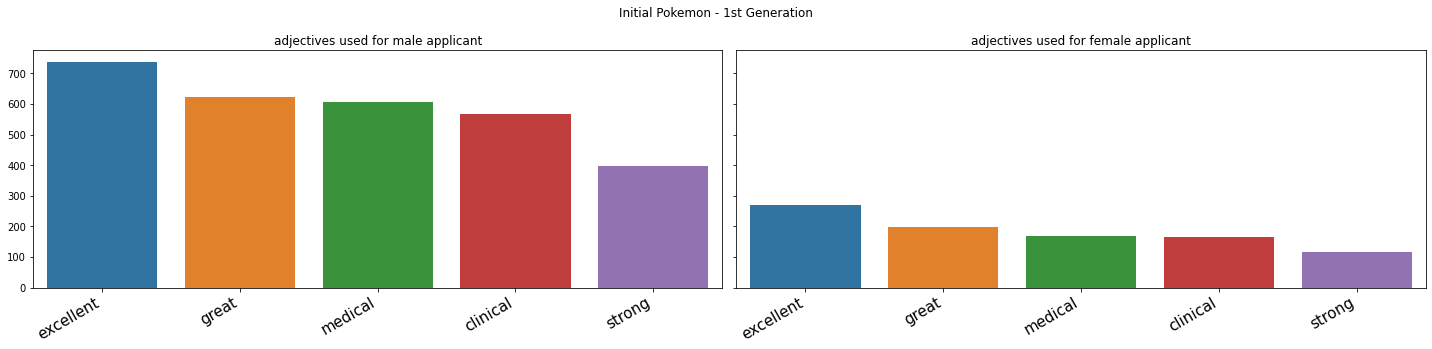

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
ax_0 = axes[0]
ax_1 = axes[1]
sns.barplot(ax =ax_0, x=lor_male_adj_counts.index,y=lor_male_adj_counts.values)
ax_0.set_title("adjectives used for male applicant")

# Charmander
sns.barplot(ax = ax_1, x=lor_female_adj_counts.index,y=lor_female_adj_counts.values)
ax_1.set_title("adjectives used for female applicant")

ax_0.set_xticklabels(labels = lor_male_adj_counts.index,rotation='45', fontsize=15)
ax_1.set_xticklabels(labels = lor_female_adj_counts.index,rotation='45', fontsize=15)

fig.tight_layout()
plt.gcf().autofmt_xdate()


In [145]:
lor_male_lor_male_adj = pd.DataFrame(df_sentiment_male[df_sentiment_male.lor_gender == "male"].adj.sum(),columns=["adj"])
lor_male_lor_female_adj = pd.DataFrame(df_sentiment_male[df_sentiment_male.lor_gender == "female"].adj.sum(),columns=["adj"])
lor_female_lor_male_adj = pd.DataFrame(df_sentiment_female[df_sentiment_female.lor_gender == "male"].adj.sum(),columns=["adj"])
lor_female_lor_female_adj = pd.DataFrame(df_sentiment_female[df_sentiment_female.lor_gender == "female"].adj.sum(),columns=["adj"])

lor_male_lor_male_adj_counts     = lor_male_lor_male_adj.adj.value_counts().head(5)
lor_male_lor_female_adj_counts   = lor_male_lor_female_adj.adj.value_counts().head(5)
lor_female_lor_male_adj_counts   = lor_female_lor_male_adj.adj.value_counts().head(5)
lor_female_lor_female_adj_counts = lor_female_lor_female_adj.adj.value_counts().head(5)

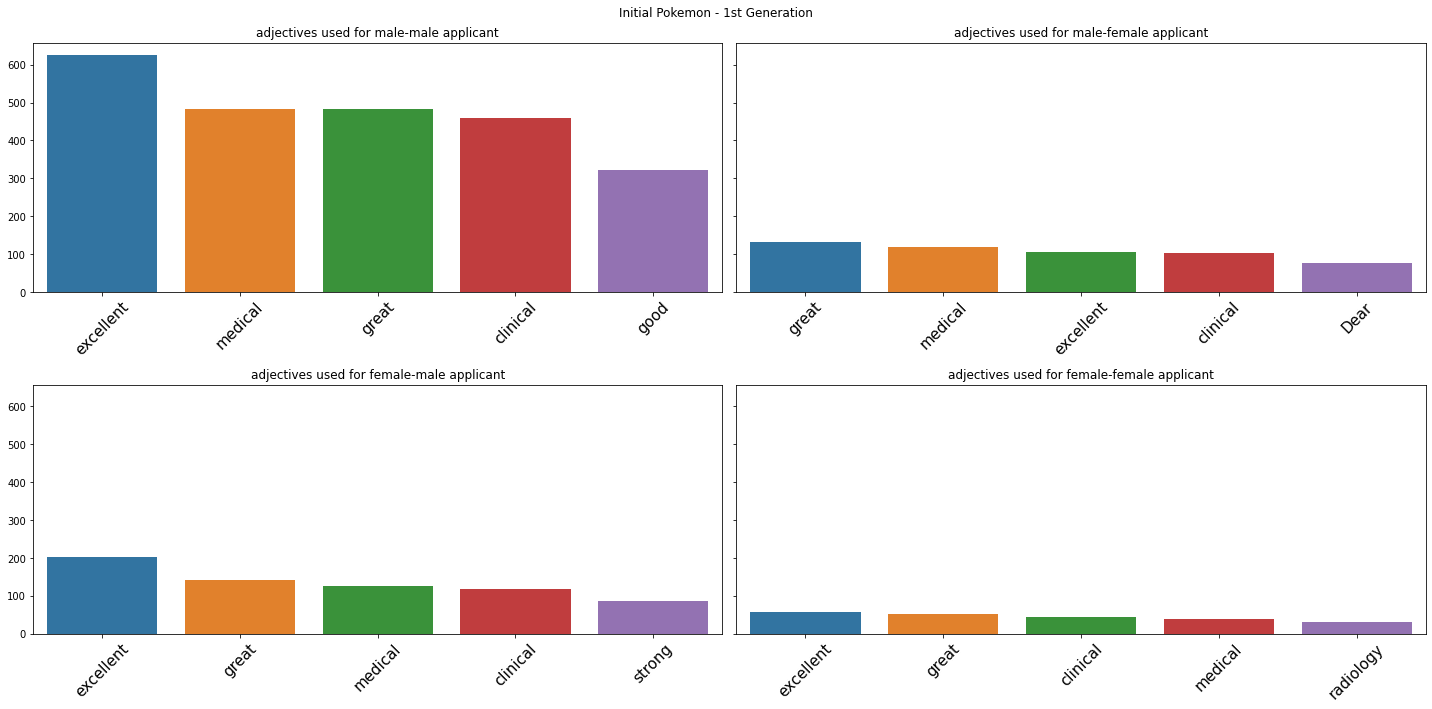

In [146]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
ax_0 = axes[0,0]
ax_1 = axes[0,1]
ax_2 = axes[1,0]
ax_3 = axes[1,1]

sns.barplot(ax =ax_0, x=lor_male_lor_male_adj_counts.index,y=lor_male_lor_male_adj_counts.values)
ax_0.set_title("adjectives used for male-male applicant")

# Charmander
sns.barplot(ax = ax_1, x=lor_male_lor_female_adj_counts.index,y=lor_male_lor_female_adj_counts.values)
ax_1.set_title("adjectives used for male-female applicant")

sns.barplot(ax =ax_2, x=lor_female_lor_male_adj_counts.index,y=lor_female_lor_male_adj_counts.values)
ax_2.set_title("adjectives used for female-male applicant")

# Charmander
sns.barplot(ax = ax_3, x=lor_female_lor_female_adj_counts.index,y=lor_female_lor_female_adj_counts.values)
ax_3.set_title("adjectives used for female-female applicant")

ax_0.set_xticklabels(labels = lor_male_lor_male_adj_counts.index,rotation='45', fontsize=15)
ax_1.set_xticklabels(labels = lor_male_lor_female_adj_counts.index,rotation='45', fontsize=15)
ax_2.set_xticklabels(labels = lor_female_lor_male_adj_counts.index,rotation='45', fontsize=15)
ax_3.set_xticklabels(labels = lor_female_lor_female_adj_counts.index,rotation='45', fontsize=15)

fig.tight_layout()


In [63]:
# Sentence clustering

In [59]:
import hdbscan
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap
model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')

In [61]:
def bert_embedding(text):
    """
    Return BERT embeddings
    :param model: SentenceTransformer object
    :param text: strings to be embedded
    :return: array
    """
    bert_embeddings = model.encode(text, show_progress_bar = False)
    return bert_embeddings

In [ ]:
bert_embedding(text)

In [63]:
male_sentence_embedding = df_male_sentence.sentence_split.apply(bert_embedding)

In [ ]:
female_sentence_embedding = df_male_sentence.sentence_split.apply(bert_embedding)

In [ ]:
male_sentence_embedding = a

# Demographics Table

## Overall Column

In [3]:
import joblib
df_new = joblib.load("df_new.h5")

In [13]:
df_new["standard_position"] = ""
df_new.lor_position = df_new.lor_position.fillna("")
df_new.loc[df_new.lor_position.str.contains(r"asso[\w\.]*\s*prof[\w\.]*",case=False),"standard_position"] = "associate professor"
df_new.loc[df_new.lor_position.str.contains(r"assi[\w\.]*\s*prof[\w\.]*",case=False),"standard_position"] = "assistant professor"
df_new.loc[ ~df_new.lor_position.str.contains(r"as[\w\.]*\s*prof[\w\.]*|assistant\s*clinical\s*prof[\w\.]|associate\s*clinical\s*prof[\w\.]*",case=False) & df_new.lor_position.str.contains("prof[\w\.]*",case=False),"standard_position"] = "professor"
df_new.loc[~df_new.lor_position.str.contains("prof[\w\.]*",case=False),"standard_position"] = "others"

In [4]:

overall_total_number_of_applicants = df_new.applicant_id.unique().shape[0]
print("total_number_of_applicants",overall_total_number_of_applicants)
overall_total_number_of_letters = df_new.shape[0]
print("total_number_of_letters",overall_total_number_of_letters)
overall_average_number_of_letters = overall_total_number_of_letters/overall_total_number_of_applicants
print("average_number_of_letters",overall_average_number_of_letters)
df_new_sentence = get_df_sentence(df_new, "lor")
overall_average_sentence_count_per_letter = df_new_sentence.shape[0]/df_new.shape[0]
print("average_sentence_count_per_letter",overall_average_sentence_count_per_letter)
df_new_sentence["word"] = df_new_sentence.sentence_split.apply(word_tokenize)
overall_total_word_count = df_new_sentence.word.str.len().sum()
overall_average_word_count_per_letter = overall_total_word_count/df_new.shape[0]
print("average_word_count_per_letter",overall_average_word_count_per_letter)
overall_male_writer_count = (df_new.lor_gender=="male").sum()
print("male_writer_count",overall_male_writer_count)

overall_female_writer_count = (df_new.lor_gender=="female").sum()
print("female_writer_count",overall_female_writer_count)
df_new["standard_position"] = ""
df_new.lor_position = df_new.lor_position.fillna("")

df_new.lor_position.value_counts()
overall_asso_prof_count = df_new.lor_position[df_new.lor_position.str.contains(r"asso[\w\.]*\s*prof[\w\.]*",case=False)].shape[0]
df_new.loc[df_new.lor_position.str.contains(r"asso[\w\.]*\s*prof[\w\.]*",case=False),"standard_position"] = "associate professor"
print("asso_prof_count",overall_asso_prof_count)

overall_assis_prof_count = df_new.lor_position[df_new.lor_position.str.contains(r"assi[\w\.]*\s*prof[\w\.]*",case=False)].shape[0]
df_new.loc[df_new.lor_position.str.contains(r"assi[\w\.]*\s*prof[\w\.]*",case=False),"standard_position"] = "assistant professor"
print("assis_prof_count",overall_assis_prof_count)

overall_prof_count = df_new.lor_position[ (~df_new.lor_position.str.contains(r"as[\w\.]*\s*prof[\w\.]*|assistant\s*clinical\s*prof[\w\.]|associate\s*clinical\s*prof[\w\.]*",case=False) & df_new.lor_position.str.contains("prof[\w\.]*",case=False))].shape[0]
df_new.loc[ ~df_new.lor_position.str.contains(r"as[\w\.]*\s*prof[\w\.]*|assistant\s*clinical\s*prof[\w\.]|associate\s*clinical\s*prof[\w\.]*",case=False) & df_new.lor_position.str.contains("prof[\w\.]*",case=False),"standard_position"] = "professor"
print("prof_count",overall_prof_count)
overall_others_count = df_new.lor_position[~df_new.lor_position.str.contains("prof[\w\.]*",case=False)].shape[0]
df_new.loc[~df_new.lor_position.str.contains("prof[\w\.]*",case=False),"standard_position"] = "others"


total_number_of_applicants 336
total_number_of_letters 1036
average_number_of_letters 3.0833333333333335
average_sentence_count_per_letter 18.388996138996138
average_word_count_per_letter 344.50868725868725
male_writer_count 824
female_writer_count 198
asso_prof_count 174
assis_prof_count 234
prof_count 193


In [171]:
print("others",overall_others_count)

others 427


In [12]:
df_new.head(5)

,applicant_id,application_year,birth_year,citizenship,foreign,medical_school,residency_school,md_year,residency_year,step1,step2,step3,step_old,IMG,class_rank,honors,received_offer,language_skills,interests,number_of_publications,speciality,gender,lor,lor_position,lor_university,lor_gender,lor_number,lor_id,standard_position
0,0,2020.0,1993,0,1,holy spirit university of kaslik,American University of Beirut Medical Center,2018.0,2023,232,244,225,0,0.0,NaN,NaN,NaN,"Arabic,french,english","Yoga, swimming, baking, hiking",1.0,0.0,female,"Dear Dr. Dachman, I am writing this letter to enthusiastically support Dr. Caline Azzi for a fellowship position in your department. Dr. Azzi is currently a 3rd-year radiology resident PGY-4 at the American University of Beirut Medical Center. The radiology residency program at AUB is accredited by the ACGME- International. In addition, residents are eligible to sit for the Fellowship of the Royal College of Radiology FRCR. I have known Dr. Azzi since February 2018. Caline came to us as a visiting medical student from an outside institution. From the get-go, she smoothly blended into the team while showing a strong and genuine interest in radiology. We were delighted to have her back as part of our residency group in June 2018. As I observed her grow in the program, Caline showed a constant desire for improving and challenging herself. Early on, she developed an excellent fund of knowledge that quickly helped her cruise through the daily routine of radiology. She actively studied physics for the FRCR part 1 exam and passed it. This also helped her, from the beginning, understand radiation safety and appreciate the intricacies of image acquisition. Caline has a joyful personality and excellent communication skills. She is a hard worker and above all, a great listener and a compassionate healer. After the “Beirut Port Blast”, Dr. Azzi took the initiative with two of my colleagues, to describe the patterns of injuries. She collected images and clinical data and submitted an abstract to RSNA. The entire faculty enjoys working with her as does the staff and her co-residents. She is always kind and respectful to referring physicians as well as patients. She is compassionate and takes time to explain results and comfort patients. During her time here, Caline has given several presentations to her co-residents and faculty members. All her presentations have been well researched, organized, thoughtful and well presented. She has also taken an active role in teaching the ...",director,American University of Beirut Medical Center,male,lor1,0,others
1,0,2020.0,1993,0,1,holy spirit university of kaslik,American University of Beirut Medical Center,2018.0,2023,232,244,225,0,0.0,NaN,NaN,NaN,"Arabic,french,english","Yoga, swimming, baking, hiking",1.0,0.0,female,"Dear Dr. Dachman, It is with great pleasure that I write a letter of recommendation for Dr. Caline Azzi, MD, who is applying for fellowship position at your institution. Dr. Azzi has been a resident in the Radiology Department at the American University of Beirut medical center since June 2018. Caline is currently PGY IV third year resident and expected to complete her radiology residency in June, 2023 I have known Caline and directly supervised her work in abdominal imaging since 2018. Dr. Azzi is an intelligent, hardworking, dedicated and reliable resident. She completed her pre-medical and medical education at the Holy Spirit University of Kaslik. Caline is ECFMG certified and has completed all parts of the USMLE. Caline has an excellent fund of general and radiologic knowledge and a very sharp radiologic eye. She is an eager learner and is highly motivated to learn and improve. She is a perfectionist who tries her hardest not to miss or make mistakes especially when doing solo overnight calls and gets quite upset at herself if she overlooks or misinterprets a finding. Caline’s performance in all sections has been excellent despite the heavy workload i

In [14]:
def get_table_column(df,column_name,csv_name):
    count_list = []
    percentage_list = []
    
    total_number_of_applicants = df.applicant_id.unique().shape[0]
    total_number_of_applicants_percentage = (total_number_of_applicants/overall_total_number_of_applicants)*100
    print(f"{column_name}_total_number_of_applicants",total_number_of_applicants)
    print(f"{column_name}_precentage_total_number_of_applicants",total_number_of_applicants_percentage)
    count_list.append(total_number_of_applicants)
    percentage_list.append(total_number_of_applicants_percentage)
    
    
    total_number_of_letters = df.shape[0]
    total_number_of_letters_percentage = (total_number_of_letters/overall_total_number_of_letters)*100
    print(f"{column_name}_total_number_of_letters",total_number_of_letters)
    print(f"{column_name}_precentage_total_number_of_letters",total_number_of_letters_percentage)
    count_list.append(total_number_of_letters)
    percentage_list.append(total_number_of_letters_percentage)
    
    
    average_number_of_letters = total_number_of_letters/total_number_of_applicants
    print(f"{column_name}_average_number_of_letters",average_number_of_letters)
    print(f"{column_name}_precentage_average_number_of_letters",(average_number_of_letters/overall_average_number_of_letters)*100)
    count_list.append(average_number_of_letters)
    percentage_list.append((average_number_of_letters/overall_average_number_of_letters)*100)   
    
    
    df_sentence = get_df_sentence(df, "lor")
    average_sentence_count_per_letter = df_sentence.shape[0]/df.shape[0]
    print(f"{column_name}_average_sentence_count_per_letter",average_sentence_count_per_letter)
    print(f"{column_name}_precentage_average_sentence_count_per_letter",(average_sentence_count_per_letter/overall_average_sentence_count_per_letter)*100)
    count_list.append(average_sentence_count_per_letter)
    percentage_list.append((average_sentence_count_per_letter/overall_average_sentence_count_per_letter)*100)  
    
    df_sentence["word"] = df_sentence.sentence_split.apply(word_tokenize)
    total_word_count = df_sentence.word.str.len().sum()
    average_word_count_per_letter = total_word_count/df.shape[0]
    print(f"{column_name}_average_word_count_per_letter",average_word_count_per_letter)
    print(f"{column_name}_precentage_average_word_count_per_letter",(average_word_count_per_letter/overall_average_word_count_per_letter)*100)
    count_list.append(average_word_count_per_letter)
    percentage_list.append((average_word_count_per_letter/overall_average_word_count_per_letter)*100)  
    
    female_writer_count = (df.lor_gender=="female").sum()
    print(f"{column_name}_female_writer_count",female_writer_count)
    print(f"{column_name}_precentage_female_writer_count",(female_writer_count/overall_female_writer_count)*100)
    count_list.append(female_writer_count)
    percentage_list.append((female_writer_count/overall_female_writer_count)*100)  
    
    male_writer_count = (df.lor_gender=="male").sum()
    print(f"{column_name}_male_writer_count",male_writer_count)
    print(f"{column_name}_precentage_male_writer_count",(male_writer_count/overall_male_writer_count)*100)
    count_list.append(male_writer_count)
    percentage_list.append((male_writer_count/overall_male_writer_count)*100)  
   
    df.lor_position = df.lor_position.fillna("")

    prof_count = df.loc[df.standard_position == "professor"].shape[0]
    print(f"{column_name}_prof_count",prof_count)
    print(f"{column_name}_precentage_prof_count",(prof_count/overall_prof_count)*100)
    count_list.append(prof_count)
    percentage_list.append((prof_count/overall_prof_count)*100)  

    asso_prof_count = df.loc[df.standard_position == "associate professor"].shape[0]
    print(f"{column_name}_asso_prof_count",asso_prof_count)
    print(f"{column_name}_precentage_asso_prof_count",(asso_prof_count/overall_asso_prof_count)*100)
    count_list.append(asso_prof_count)
    percentage_list.append((asso_prof_count/overall_asso_prof_count)*100)  
    
    assis_prof_count = df.loc[df.standard_position == "assistant professor"].shape[0]
    print(f"{column_name}_assis_prof_count",assis_prof_count)
    print(f"{column_name}_precentage_assis_prof_count",(assis_prof_count/overall_assis_prof_count)*100)
    count_list.append(assis_prof_count)
    percentage_list.append((assis_prof_count/overall_assis_prof_count)*100)  
    
    
    
    others_count = df.loc[df.standard_position == "others"].shape[0]
    print(f"{column_name}others_count",others_count)
    print(f"{column_name}_precentage_others_count",(others_count/overall_others_count)*100)
    count_list.append(others_count)
    percentage_list.append((others_count/overall_others_count)*100)    
    index_list = ["Total number of applicants",
                  "Total number of letters",
                  "Average number of letters",
                  "Average sentence count per letter",
                  "Average word count per letter",
                  "Female",
                  "Male",
                  "Full professor",
                  "Associate professor",
                  "Assistant professor",
                  "Not applicable/Unknown"]

    df = pd.DataFrame({"counts":count_list, "percentage":percentage_list},index =index_list ) 
    df.to_csv(".//demographics_results//" + csv_name + ".csv")

In [15]:
df_male = df_new.loc[df_new.gender == "male"]
get_table_column(df_male,"male","male")

male_total_number_of_applicants 261
male_precentage_total_number_of_applicants 77.67857142857143
male_total_number_of_letters 805
male_precentage_total_number_of_letters 77.7027027027027
male_average_number_of_letters 3.0842911877394634
male_precentage_average_number_of_letters 100.03106554830691


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_average_sentence_count_per_letter 18.104347826086958
male_precentage_average_sentence_count_per_letter 98.45207258320346
male_average_word_count_per_letter 340.4086956521739
male_precentage_average_word_count_per_letter 98.80990182304613
male_female_writer_count 142
male_precentage_female_writer_count 71.71717171717171
male_male_writer_count 655
male_precentage_male_writer_count 79.49029126213593
male_prof_count 152
male_precentage_prof_count 78.75647668393782
male_asso_prof_count 133
male_precentage_asso_prof_count 76.4367816091954
male_assis_prof_count 170
male_precentage_assis_prof_count 72.64957264957265
maleothers_count 345
male_precentage_others_count 80.79625292740047


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df_female = df_new.loc[df_new.gender == "female"]
get_table_column(df_female,"female","female")

female_total_number_of_applicants 73
female_precentage_total_number_of_applicants 21.726190476190478
female_total_number_of_letters 223
female_precentage_total_number_of_letters 21.525096525096522
female_average_number_of_letters 3.0547945205479454
female_precentage_average_number_of_letters 99.07441688263606
female_average_sentence_count_per_letter 19.2152466367713
female_precentage_average_sentence_count_per_letter 104.49317891814114


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


female_average_word_count_per_letter 356.9237668161435
female_precentage_average_word_count_per_letter 103.60370580383476
female_female_writer_count 55
female_precentage_female_writer_count 27.77777777777778
female_male_writer_count 162
female_precentage_male_writer_count 19.66019417475728
female_prof_count 41
female_precentage_prof_count 21.243523316062177
female_asso_prof_count 39
female_precentage_asso_prof_count 22.413793103448278
female_assis_prof_count 59
female_precentage_assis_prof_count 25.213675213675213
femaleothers_count 81
female_precentage_others_count 18.969555035128806


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
df_foreign = df_new.loc[df_new.foreign == 1]
get_table_column(df_foreign,"foreign","foreign_yes")

foreign_total_number_of_applicants 95
foreign_precentage_total_number_of_applicants 28.273809523809522
foreign_total_number_of_letters 295
foreign_precentage_total_number_of_letters 28.474903474903474
foreign_average_number_of_letters 3.1052631578947367
foreign_precentage_average_number_of_letters 100.71123755334281
foreign_average_sentence_count_per_letter 18.11864406779661
foreign_precentage_average_sentence_count_per_letter 98.52981604239824


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


foreign_average_word_count_per_letter 346.64406779661016
foreign_precentage_average_word_count_per_letter 100.61983358240238
foreign_female_writer_count 39
foreign_precentage_female_writer_count 19.696969696969695
foreign_male_writer_count 253
foreign_precentage_male_writer_count 30.70388349514563
foreign_prof_count 62
foreign_precentage_prof_count 32.12435233160622
foreign_asso_prof_count 37
foreign_precentage_asso_prof_count 21.26436781609195
foreign_assis_prof_count 54
foreign_precentage_assis_prof_count 23.076923076923077
foreignothers_count 141
foreign_precentage_others_count 33.021077283372364


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df_foreign = df_new.loc[df_new.foreign == 0]
get_table_column(df_foreign,"not_foreign","foreign_no")

not_foreign_total_number_of_applicants 241
not_foreign_precentage_total_number_of_applicants 71.72619047619048
not_foreign_total_number_of_letters 741
not_foreign_precentage_total_number_of_letters 71.52509652509652
not_foreign_average_number_of_letters 3.074688796680498
not_foreign_precentage_average_number_of_letters 99.71963664909723


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


not_foreign_average_sentence_count_per_letter 18.483130904183536
not_foreign_precentage_average_sentence_count_per_letter 100.51190812416222
not_foreign_average_word_count_per_letter 343.6842105263158
not_foreign_precentage_average_word_count_per_letter 99.76068042320443
not_foreign_female_writer_count 159
not_foreign_precentage_female_writer_count 80.3030303030303
not_foreign_male_writer_count 571
not_foreign_precentage_male_writer_count 69.29611650485437
not_foreign_prof_count 131
not_foreign_precentage_prof_count 67.87564766839378
not_foreign_asso_prof_count 137
not_foreign_precentage_asso_prof_count 78.73563218390804
not_foreign_assis_prof_count 180
not_foreign_precentage_assis_prof_count 76.92307692307693
not_foreignothers_count 286
not_foreign_precentage_others_count 66.97892271662764


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Word Analysis

In [20]:
import pandas as pd
import re
import numpy as np
import scipy.stats as stats
df_word_list = pd.read_excel("LOR Project_reviewed.xlsx",sheet_name="Word list")

In [21]:
df_word_list["Agency"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


['achieve\\w*',
 'active\\w*',
 'aggressive',
 'ambitio\\w*',
 'analyt\\w*',
 'aspirat\\w*',
 'assertive',
 'attention',
 'autonom\\w*',
 'competen\\w*',
 'competing',
 'confiden\\w*',
 'courage\\w*',
 'decisive',
 'dedicat\\w*',
 'defend',
 'desire',
 'determination',
 'determined',
 'force\\w*',
 'goal oriented',
 'goal-oriented',
 'hard work\\w*',
 'independen\\w*',
 'industrious',
 'industrious\\w*',
 'intelligen\\w*',
 'lead\\w*',
 'master',
 'mastered',
 'mastery',
 'outspoken',
 'rewards',
 'self direct\\w*',
 'self motivated',
 'self starter',
 'self-assure\\w*',
 'self-direct\\w*',
 'self driven',
 'self-driven',
 'self-motivated',
 'self-relian\\w*',
 'self-starter',
 'serious',
 'skill\\w*',
 'strong',
 'tough',
 'under pressure',
 'work ethic',
 'work-ethic']

In [22]:
agency = df_word_list["Agency"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
communality = df_word_list["Communality"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
grindstone = df_word_list["Grindstone"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
standout = df_word_list["Standout"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
social = df_word_list["Social"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()
radiology = df_word_list["Radiology"].str.strip().str.lower().str.replace(r"\*",r"\\w*").dropna().tolist()


c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True 

In [23]:
agency_pattern = r"\b" + r"\b|\b".join(agency) + r"\b"
communality_pattern = r"\b" + r"\b|\b".join(communality) + r"\b"
grindstone_pattern = r"\b" + r"\b|\b".join(grindstone) + r"\b"
standout_pattern = r"\b" + r"\b|\b".join(standout) + r"\b"
social_pattern = r"\b" + r"\b|\b".join(social) + r"\b"
radiology_pattern = r"\b" + r"\b|\b".join(radiology) + r"\b"


In [24]:
def create_pattern(word_list):
    pattern = r"\b" + r"\b|\b".join(word_list) + r"\b"
    pattern = re.sub(r"\s+",r" ",pattern)
    pattern = re.sub(r"$\s+|^\s+",r"",pattern)
    pattern = re.sub(r"\s",r"-",pattern)

    

    pattern = re.sub(r"-",r"\\s*-*\\s*",pattern)
    return pattern

In [25]:
agency_pattern = create_pattern(agency)
communality_pattern = create_pattern(communality) 
grindstone_pattern = create_pattern(grindstone) 
standout_pattern = create_pattern(standout)
social_pattern = create_pattern(social)
radiology_pattern = create_pattern(radiology)

In [26]:
agency_pattern

'\\bachieve\\w*\\b|\\bactive\\w*\\b|\\baggressive\\b|\\bambitio\\w*\\b|\\banalyt\\w*\\b|\\baspirat\\w*\\b|\\bassertive\\b|\\battention\\b|\\bautonom\\w*\\b|\\bcompeten\\w*\\b|\\bcompeting\\b|\\bconfiden\\w*\\b|\\bcourage\\w*\\b|\\bdecisive\\b|\\bdedicat\\w*\\b|\\bdefend\\b|\\bdesire\\b|\\bdetermination\\b|\\bdetermined\\b|\\bforce\\w*\\b|\\bgoal\\s*-*\\s*oriented\\b|\\bgoal\\s*-*\\s*oriented\\b|\\bhard\\s*-*\\s*work\\w*\\b|\\bindependen\\w*\\b|\\bindustrious\\b|\\bindustrious\\w*\\b|\\bintelligen\\w*\\b|\\blead\\w*\\b|\\bmaster\\b|\\bmastered\\b|\\bmastery\\b|\\boutspoken\\b|\\brewards\\b|\\bself\\s*-*\\s*direct\\w*\\b|\\bself\\s*-*\\s*motivated\\b|\\bself\\s*-*\\s*starter\\b|\\bself\\s*-*\\s*assure\\w*\\b|\\bself\\s*-*\\s*direct\\w*\\b|\\bself\\s*-*\\s*driven\\b|\\bself\\s*-*\\s*driven\\b|\\bself\\s*-*\\s*motivated\\b|\\bself\\s*-*\\s*relian\\w*\\b|\\bself\\s*-*\\s*starter\\b|\\bserious\\b|\\bskill\\w*\\b|\\bstrong\\b|\\btough\\b|\\bunder\\s*-*\\s*pressure\\b|\\bwork\\s*-*\\s*ethic\\b

In [27]:
df_female = df_new.loc[(df_new.gender == "female")]
df_male = df_new.loc[(df_new.gender == "male")]
df_writer_male = df_new.loc[(df_new.lor_gender == "male")]
df_writer_female = df_new.loc[(df_new.lor_gender == "female")]
df_prof = df_new.loc[df_new.standard_position == "professor"]
df_asso_prof = df_new.loc[df_new.standard_position == "associate professor"]
df_asis_prof = df_new.loc[df_new.standard_position == "assistant professor"]
df_other = df_new.loc[df_new.standard_position == "others"]
df_female_male = df_new.loc[(df_new.lor_gender == "male") & (df_new.gender == "female")]
df_male_male = df_new.loc[(df_new.lor_gender == "male") & (df_new.gender == "male")]
df_female_female = df_new.loc[(df_new.lor_gender == "female") & (df_new.gender == "female")]
df_male_female = df_new.loc[(df_new.lor_gender == "female") & (df_new.gender == "male")]


In [29]:
# def get_word_result_agecy_comm(df,column_name):
#     df_sentence = get_df_sentence(df, "lor")
#     df_sentence["word"] = df_sentence.sentence_split.apply(word_tokenize)
#     overall_total_word_count = df_sentence.word.str.len().sum()

#     found_words_list = df.lor.str.lower().str.findall(agency_pattern).sum()    
#     total_agency_comm_words_list = df.lor.str.lower().str.findall(agency_pattern).sum() + df.lor.str.lower().str.findall(communality_pattern).sum()

#     if type(found_words_list) == list:
#         agency_result = len(found_words_list)
#         total_agency_comm_words_list_result = len(total_agency_comm_words_list)
#     else:
#         agency_result = 0
#     print(f"{column_name}_agency_result",agency_result)
#     print(f"{column_name}_percentage_agency_result: %",(agency_result/total_agency_comm_words_list_result)*100)
    
#     found_words_list = df.lor.str.lower().str.findall(communality_pattern).sum()
#     if type(found_words_list) == list:
#         communality_result = len(found_words_list)
#     else:
#         communality_result = 0
        
#     print(f"{column_name}_communality_result",communality_result)
#     print(f"{column_name}_percentage_communality_result: %",(communality_result/total_agency_comm_words_list_result)*100)

In [30]:
sum([3,4,5])

12

In [42]:
word_pattern_list = [agency_pattern,communality_pattern, grindstone_pattern, standout_pattern,social_pattern, radiology_pattern]


def get_word_result(df,column_name):
    df_sentence = get_df_sentence(df, "lor")
    df_sentence["word"] = df_sentence.sentence_split.apply(word_tokenize)
    #total word count for all word patterns
    overall_total_word_count = 0
    for pattern in word_pattern_list:
        found_special_word_list = df.lor.str.lower().str.findall(pattern).sum() 
        if type(found_special_word_list) == list:
            word_count = len(found_special_word_list)
        else:
            word_count = 0
        overall_total_word_count +=word_count

    #overall_total_word_count = df_sentence.word.str.len().sum()

    found_words_list = df.lor.str.lower().str.findall(agency_pattern).sum()    

    if type(found_words_list) == list:
        agency_result = len(found_words_list)
    else:
        agency_result = 0
    print(f"{column_name}_agency_result",agency_result)
    agency_percentage = (agency_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_agency_result: %",agency_percentage)
    
    found_words_list = df.lor.str.lower().str.findall(communality_pattern).sum()
    if type(found_words_list) == list:
        communality_result = len(found_words_list)
    else:
        communality_result = 0
        
    print(f"{column_name}_communality_result",communality_result)
    communality_percentage = (communality_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_communality_result: %",communality_percentage)
    
    found_words_list = df.lor.str.lower().str.findall(grindstone_pattern).sum()
    if type(found_words_list) == list:
        grindstone_result = len(found_words_list)
    else:
        grindstone_result = 0
    print(f"{column_name}_grindstone_result",grindstone_result)
    grindstone_percentage = (grindstone_result/overall_total_word_count)*100
    print(f"{column_name}_percentage__grindstone_result: %",grindstone_percentage)
    
    found_words_list = df.lor.str.lower().str.findall(standout_pattern).sum()
    if type(found_words_list) == list:
        standout_result = len(found_words_list)
    else:
        standout_result = 0
    print(f"{column_name}_standout_result",standout_result)
    standout_percentage = (standout_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_standout_result: %",standout_percentage)
    
    found_words_list = df.lor.str.lower().str.findall(social_pattern).sum()
    if type(found_words_list) == list:
        social_result = len(found_words_list)
    else:
        social_result = 0
    print(f"{column_name}_social_result",social_result)
    social_percentage = (social_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_social_result: %",social_percentage)
    
    
    found_words_list = df.lor.str.lower().str.findall(radiology_pattern).sum()
    if type(found_words_list) == list:
        radiology_result = len(found_words_list)
    else:
        radiology_result = 0

    print(f"{column_name}_radiology_result",radiology_result)
    radiology_percentage = (radiology_result/overall_total_word_count)*100
    print(f"{column_name}_percentage_radiology_result: %",radiology_percentage)
    
    result_dic = {"agency_count":agency_result,
                  "communality_count":communality_result,
                  "grindstone_count":grindstone_result,
                  "standout_count":standout_result,
                  "social_count": social_result,
                  "radiology_count":radiology_result                                  
                  }
    
    result_list = result_dic.values()
    percentage_list = [agency_percentage,communality_percentage, grindstone_percentage, standout_percentage, social_percentage, radiology_percentage]
    df_result = pd.DataFrame({"word_counts":result_list,
                  "percentages":percentage_list})
    df_result.to_csv(f".\\word_counts_results\\{column_name}.csv")
    return result_dic

In [32]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[8, 2], [1, 5]])
oddsratio

20.0

In [33]:
app_male_dict = get_word_result_agecy_comm(df_male,"applicant_male")

NameError: name 'get_word_result_agecy_comm' is not defined

In [34]:
print(app_male_dict)

NameError: name 'app_male_dict' is not defined

In [35]:
get_word_result_agecy_comm(df_female,"applicant_female")

NameError: name 'get_word_result_agecy_comm' is not defined

In [25]:
app_male_dict = get_word_result(df_male,"applicant_male")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_male_agency_result 3496
applicant_male_percentage_agency_result: % 1.2757773812260746
applicant_male_communality_result 1536
applicant_male_percentage_communality_result: % 0.5605246160077948
applicant_male_grindstone_result 917
applicant_male_percentage__grindstone_result: % 0.3346361151556952
applicant_male_standout_result 1740
applicant_male_percentage_standout_result: % 0.63496929157133
applicant_male_social_result 93
applicant_male_percentage_social_result: % 0.033938013859846954
applicant_male_radiology_result 160
applicant_male_percentage_radiology_result: % 0.058387980834145294


In [26]:
app_female_dict = get_word_result(df_female,"applicant_female")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_female_agency_result 1067
applicant_female_percentage_agency_result: % 1.3405533080382943
applicant_female_communality_result 449
applicant_female_percentage_communality_result: % 0.5641128728296103
applicant_female_grindstone_result 250
applicant_female_percentage__grindstone_result: % 0.314094027187979
applicant_female_standout_result 567
applicant_female_percentage_standout_result: % 0.7123652536623363
applicant_female_social_result 33
applicant_female_percentage_social_result: % 0.04146041158881322
applicant_female_radiology_result 66
applicant_female_percentage_radiology_result: % 0.08292082317762645


In [27]:

app_male_choosen = app_male_dict["agency_count"]
app_male_others = sum([value for key,value in app_male_dict.items() if key != "agency_count"])
app_female_choosen = app_female_dict["agency_count"]
app_female_others = sum([value for key,value in app_female_dict.items() if key != "agency_count"])


oddsratio, pvalue = stats.fisher_exact([[app_male_choosen, app_male_others],[app_female_choosen,app_female_others]])  
print(oddsratio, pvalue)


1.005935645110903 0.9070904081736366


In [39]:
def get_odds_ratio(word_type,dict_1,dict_2):
    
    group_1_choosen_type_count = dict_1[word_type+"_count"]
    group_1_others_count = sum([value for key,value in dict_1.items() if key != word_type+"_count"])
    group_2_choosen_type_count = dict_2[word_type+"_count"]
    group_2_others_count = sum([value for key,value in dict_2.items() if key != word_type+"_count"])


    oddsratio, pvalue = stats.fisher_exact([[group_1_choosen_type_count, group_1_others_count],[group_2_choosen_type_count, group_2_others_count]])  
    #print("oddsratio:",oddsratio, "\npvalue:",pvalue)
    return oddsratio, pvalue

In [40]:
word_type_list = ["agency","communality", "grindstone", "standout","social", "radiology"]


In [41]:
def word_odd_analyse(dict_1,dict_2,csv_name):
    odds_ratio_list  = []
    p_value_list=[]
    for word_type in word_type_list:
        odds_ratio,p_value = get_odds_ratio(word_type,dict_1,dict_2)
        odds_ratio_list.append(odds_ratio)
        p_value_list.append(p_value)
    df = pd.DataFrame({"od":odds_ratio_list,"p":p_value_list},index = word_type_list)
    df.to_csv(".\\word_odds_results\\"+csv_name)
    return df

In [209]:
df_appmale_appfemale = word_odd_analyse(app_female_dict,app_male_dict,"word_odds_appmale_appfemale.csv")


In [56]:
(app_male_choosen/app_male_others)/(app_female_choosen/app_female_others)

1.0059356451109027

In [57]:
(app_female_choosen/app_female_others)/(app_male_choosen/app_male_others)

0.9940993788819876

In [58]:
ar=np.array([[app_male_choosen, app_male_others],[app_female_choosen, app_female_others]])    
df=pd.DataFrame(ar, columns=["Responded", "No Response"])
df.index=["Males", "Females"] 
df 

,Responded,No Response
Males,3496,4446
Females,1067,1365


# Aşağıdaki fonksiyon sonuçlarını ilgili dictionary'e eşitle ve expanded exceldekine göre yeni dataframeler ayarla
# Çıktıları otomatikleştir ve kolayca hepsini çıktı al

In [81]:
writer_male_dic,dfx = get_word_result(df_writer_male,"writer_male")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


writer_male_agency_result 3626
writer_male_percentage_agency_result: % 1.2974187592583315
writer_male_communality_result 1524
writer_male_percentage_communality_result: % 0.5453023135989237
writer_male_grindstone_result 910
writer_male_percentage__grindstone_result: % 0.32560702452429174
writer_male_standout_result 1888
writer_male_percentage_standout_result: % 0.6755451234086404
writer_male_social_result 100
writer_male_percentage_social_result: % 0.035780991705966124
writer_male_radiology_result 171
writer_male_percentage_radiology_result: % 0.06118549581720207


In [83]:
writer_male_dic

{'agency_count': 3626,
 'communality_count': 1524,
 'grindstone_count': 910,
 'standout_count': 1888,
 'social_count': 100,
 'radiology_count': 171}

In [183]:
found_words_list = df_writer_male.lor.str.lower().str.findall(agency_pattern).sum()  

In [175]:
dfx.to_csv(".\\word_counts_results\\writer_male_dic.csv")

In [201]:
app_male_dic,df_app_male_dic = get_word_result(df_male,"applicant_male")
app_female_dic, df_app_female_dic = get_word_result(df_female,"applicant_female")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_male_agency_result 3496
applicant_male_percentage_agency_result: % 44.01913875598086
applicant_male_communality_result 1536
applicant_male_percentage_communality_result: % 19.340216570133467
applicant_male_grindstone_result 917
applicant_male_percentage__grindstone_result: % 11.546210022664315
applicant_male_standout_result 1740
applicant_male_percentage_standout_result: % 21.90883908335432
applicant_male_social_result 93
applicant_male_percentage_social_result: % 1.1709896751448
applicant_male_radiology_result 160
applicant_male_percentage_radiology_result: % 2.014605892722236
applicant_female_agency_result 1067
applicant_female_percentage_agency_result: % 43.87335526315789
applicant_female_communality_result 449
applicant_female_percentage_communality_result: % 18.46217105263158
applicant_female_grindstone_result 250
applicant_female_percentage__grindstone_result: % 10.279605263157894
applicant_female_standout_result 567
applicant_female_percentage_standout_result: % 23.314

In [204]:
app_male_dic = get_word_result(df_male, "applicant_male")
app_female_dic = get_word_result(df_female, "applicant_female")
writer_male_dic = get_word_result(df_writer_male, "writer_male")
writer_female_dic = get_word_result(df_writer_female, "writer_female")
writer_male_applicant_female_dic = get_word_result(
    df_female_male, "writer_male_applicant_female"
)
writer_male_applicant_male_dic = get_word_result(
    df_male_male, "writer_male_applicant_male"
)
writer_female_applicant_female_dic = get_word_result(
    df_female_female, "writer_female_applicant_female"
)
writer_female_applicant_male_dic = get_word_result(
    df_male_female, "writer_female_applicant_male"
)
prof_dic = get_word_result(df_prof, "prof")
asso_dic = get_word_result(df_asso_prof, "asso")
asis_dic = get_word_result(df_asis_prof, "asis")
others_dic = get_word_result(df_other, "others")



c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


applicant_male_agency_result 3496
applicant_male_percentage_agency_result: % 44.01913875598086
applicant_male_communality_result 1536
applicant_male_percentage_communality_result: % 19.340216570133467
applicant_male_grindstone_result 917
applicant_male_percentage__grindstone_result: % 11.546210022664315
applicant_male_standout_result 1740
applicant_male_percentage_standout_result: % 21.90883908335432
applicant_male_social_result 93
applicant_male_percentage_social_result: % 1.1709896751448
applicant_male_radiology_result 160
applicant_male_percentage_radiology_result: % 2.014605892722236
applicant_female_agency_result 1067
applicant_female_percentage_agency_result: % 43.87335526315789
applicant_female_communality_result 449
applicant_female_percentage_communality_result: % 18.46217105263158
applicant_female_grindstone_result 250
applicant_female_percentage__grindstone_result: % 10.279605263157894
applicant_female_standout_result 567
applicant_female_percentage_standout_result: % 23.314

In [205]:
writer_female_applicant_female_dic

{'agency_count': 283,
 'communality_count': 119,
 'grindstone_count': 86,
 'standout_count': 130,
 'social_count': 8,
 'radiology_count': 16}

In [210]:
df_appmale_appfemale = word_odd_analyse(app_female_dict,app_male_dict,"app_male-app_female.csv")

In [212]:
df_female_female_odds = word_odd_analyse(writer_female_applicant_female_dic,writer_female_applicant_male_dic,"wr_female_app_female-wr_female_app_male.csv")
df_female_female_odds

,od,p
agency,1.017242,0.886152
communality,0.784574,0.042927
grindstone,1.204798,0.190269
standout,1.088301,0.472397
social,1.138013,0.824191
radiology,1.010295,1.000000


In [213]:
df_male_male_odds = word_odd_analyse(writer_male_applicant_female_dic,writer_male_applicant_male_dic,"wr_male_app_female-wr_male_app_male.csv")

In [215]:
writer_female_dic2writer_male_dic = word_odd_analyse(writer_female_dic,writer_male_dic,"wr_female-wr_male.csv")

In [ ]:
df_female = df_new.loc[(df_new.gender == "female")]
df_male = df_new.loc[(df_new.gender == "male")]
df_writer_male = df_new.loc[(df_new.lor_gender == "male")]
df_writer_female = df_new.loc[(df_new.lor_gender == "female")]


In [46]:

df_female_prof = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "female")]
df_female_asso_prof = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "female")]
df_female_asis_prof = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "female")]
df_female_other = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "female")]

female_prof_dic = get_word_result(df_female_prof, "female_prof")
female_asso_prof_dic = get_word_result(df_female_asso_prof, "female_asso_prof")
female_asis_prof_dic = get_word_result(df_female_asis_prof, "female_asis_prof")
female_other_prof_dic = get_word_result(df_female_other, "female_other_prof")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_prof_agency_result 651
male_prof_percentage_agency_result: % 41.124447252053066
male_prof_communality_result 293
male_prof_percentage_communality_result: % 18.509159823120658
male_prof_grindstone_result 171
male_prof_percentage__grindstone_result: % 10.80227416298168
male_prof_standout_result 424
male_prof_percentage_standout_result: % 26.784586228679725
male_prof_social_result 17
male_prof_percentage_social_result: % 1.0739102969046115
male_prof_radiology_result 27
male_prof_percentage_radiology_result: % 1.705622236260265
male_asso_prof_agency_result 671
male_asso_prof_percentage_agency_result: % 43.51491569390402
male_asso_prof_communality_result 271
male_asso_prof_percentage_communality_result: % 17.5745784695201
male_asso_prof_grindstone_result 177
male_asso_prof_percentage__grindstone_result: % 11.478599221789883
male_asso_prof_standout_result 364
male_asso_prof_percentage_standout_result: % 23.605706874189362
male_asso_prof_social_result 19
male_asso_prof_percentage_social_

In [ ]:
df_male_prof = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "male")]
df_male_asso_prof = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "male")]
df_male_asis_prof = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "male")]
df_male_other = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "male")]

male_prof_dic = get_word_result(df_male_prof, "male_prof")
male_asso_prof_dic = get_word_result(df_male_asso_prof, "male_asso_prof")
male_asis_prof_dic = get_word_result(df_male_asis_prof, "male_asis_prof")
male_other_prof_dic = get_word_result(df_male_other, "male_other_prof")

In [48]:

df_male_prof_male_app = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "male")& (df_new.gender == "male")]
df_male_asso_prof_male_app = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "male")& (df_new.gender == "male")]
df_male_asis_prof_male_app = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "male")& (df_new.gender == "male")]
df_male_other_male_app = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "male")& (df_new.gender == "male")]

male_prof_male_app_dic = get_word_result(df_male_prof_male_app, "male_prof_male_app")
male_asso_male_app_prof_dic = get_word_result(df_male_asso_prof_male_app, "male_asso_prof_male_app")
male_asis_male_app_prof_dic = get_word_result(df_male_asis_prof_male_app, "male_asis_prof_male_app")
male_other_male_app_prof_dic = get_word_result(df_male_other_male_app, "male_other_prof_male_app")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_prof_male_app_agency_result 496
male_prof_male_app_percentage_agency_result: % 40.32520325203252
male_prof_male_app_communality_result 233
male_prof_male_app_percentage_communality_result: % 18.943089430894307
male_prof_male_app_grindstone_result 139
male_prof_male_app_percentage__grindstone_result: % 11.300813008130081
male_prof_male_app_standout_result 328
male_prof_male_app_percentage_standout_result: % 26.666666666666668
male_prof_male_app_social_result 14
male_prof_male_app_percentage_social_result: % 1.1382113821138211
male_prof_male_app_radiology_result 20
male_prof_male_app_percentage_radiology_result: % 1.6260162601626018
male_asso_prof_male_app_agency_result 514
male_asso_prof_male_app_percentage_agency_result: % 42.97658862876254
male_asso_prof_male_app_communality_result 223
male_asso_prof_male_app_percentage_communality_result: % 18.645484949832774
male_asso_prof_male_app_grindstone_result 140
male_asso_prof_male_app_percentage__grindstone_result: % 11.705685618729097

In [49]:

df_female_prof_male_app = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "female")& (df_new.gender == "male")]
df_female_asso_prof_male_app = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "female")& (df_new.gender == "male")]
df_female_asis_prof_male_app = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "female")& (df_new.gender == "male")]
df_female_other_male_app = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "female")& (df_new.gender == "male")]

female_prof_male_app_dic = get_word_result(df_female_prof_male_app, "female_prof_male_app")
female_asso_male_app_prof_dic = get_word_result(df_female_asso_prof_male_app, "female_asso_prof_male_app")
female_asis_male_app_prof_dic = get_word_result(df_female_asis_prof_male_app, "female_asis_prof_male_app")
female_other_male_app_prof_dic = get_word_result(df_female_other_male_app, "female_other_prof_male_app")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


female_prof_male_app_agency_result 105
female_prof_male_app_percentage_agency_result: % 43.0327868852459
female_prof_male_app_communality_result 59
female_prof_male_app_percentage_communality_result: % 24.18032786885246
female_prof_male_app_grindstone_result 23
female_prof_male_app_percentage__grindstone_result: % 9.426229508196721
female_prof_male_app_standout_result 45
female_prof_male_app_percentage_standout_result: % 18.442622950819672
female_prof_male_app_social_result 3
female_prof_male_app_percentage_social_result: % 1.2295081967213115
female_prof_male_app_radiology_result 9
female_prof_male_app_percentage_radiology_result: % 3.6885245901639343
female_asso_prof_male_app_agency_result 152
female_asso_prof_male_app_percentage_agency_result: % 45.103857566765576
female_asso_prof_male_app_communality_result 88
female_asso_prof_male_app_percentage_communality_result: % 26.112759643916917
female_asso_prof_male_app_grindstone_result 39
female_asso_prof_male_app_percentage__grindstone_r

In [50]:

df_female_prof_female_app = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "female")& (df_new.gender == "female")]
df_female_asso_prof_female_app = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "female")& (df_new.gender == "female")]
df_female_asis_prof_female_app = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "female")& (df_new.gender == "female")]
df_female_other_female_app = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "female")& (df_new.gender == "female")]

female_prof_female_app_dic = get_word_result(df_female_prof_female_app, "female_prof_female_app")
female_asso_female_app_prof_dic = get_word_result(df_female_asso_prof_female_app, "female_asso_prof_female_app")
female_asis_female_app_prof_dic = get_word_result(df_female_asis_prof_female_app, "female_asis_prof_female_app")
female_other_female_app_prof_dic = get_word_result(df_female_other_female_app, "female_other_prof_female_app")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


female_prof_female_app_agency_result 69
female_prof_female_app_percentage_agency_result: % 44.230769230769226
female_prof_female_app_communality_result 22
female_prof_female_app_percentage_communality_result: % 14.102564102564102
female_prof_female_app_grindstone_result 27
female_prof_female_app_percentage__grindstone_result: % 17.307692307692307
female_prof_female_app_standout_result 31
female_prof_female_app_percentage_standout_result: % 19.871794871794872
female_prof_female_app_social_result 3
female_prof_female_app_percentage_social_result: % 1.9230769230769231
female_prof_female_app_radiology_result 4
female_prof_female_app_percentage_radiology_result: % 2.564102564102564
female_asso_prof_female_app_agency_result 62
female_asso_prof_female_app_percentage_agency_result: % 49.6
female_asso_prof_female_app_communality_result 21
female_asso_prof_female_app_percentage_communality_result: % 16.8
female_asso_prof_female_app_grindstone_result 14
female_asso_prof_female_app_percentage__gri

In [51]:
df_male_prof_female_app = df_new.loc[(df_new.standard_position == "professor") & (df_new.lor_gender == "male")& (df_new.gender == "female")]
df_male_asso_prof_female_app = df_new.loc[(df_new.standard_position == "associate professor") & (df_new.lor_gender == "male")& (df_new.gender == "female")]
df_male_asis_prof_female_app = df_new.loc[(df_new.standard_position == "assistant professor")& (df_new.lor_gender == "male")& (df_new.gender == "female")]
df_male_other_female_app = df_new.loc[(df_new.standard_position == "others") & (df_new.lor_gender == "male")& (df_new.gender == "female")]

male_prof_female_app_dic = get_word_result(df_male_prof_female_app, "male_prof_female_app")
male_asso_female_app_prof_dic = get_word_result(df_male_asso_prof_female_app, "male_asso_prof_female_app")
male_asis_female_app_prof_dic = get_word_result(df_male_asis_prof_female_app, "male_asis_prof_female_app")
male_other_female_app_prof_dic = get_word_result(df_male_other_female_app, "male_other_prof_female_app")

c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\Anaconda3\envs\k12\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


male_prof_female_app_agency_result 155
male_prof_female_app_percentage_agency_result: % 43.90934844192634
male_prof_female_app_communality_result 60
male_prof_female_app_percentage_communality_result: % 16.997167138810198
male_prof_female_app_grindstone_result 32
male_prof_female_app_percentage__grindstone_result: % 9.06515580736544
male_prof_female_app_standout_result 96
male_prof_female_app_percentage_standout_result: % 27.19546742209632
male_prof_female_app_social_result 3
male_prof_female_app_percentage_social_result: % 0.84985835694051
male_prof_female_app_radiology_result 7
male_prof_female_app_percentage_radiology_result: % 1.9830028328611897
male_asso_prof_female_app_agency_result 152
male_asso_prof_female_app_percentage_agency_result: % 46.20060790273556
male_asso_prof_female_app_communality_result 45
male_asso_prof_female_app_percentage_communality_result: % 13.677811550151976
male_asso_prof_female_app_grindstone_result 36
male_asso_prof_female_app_percentage__grindstone_resu